In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import timeit

sns.set_theme(style="ticks")
df = pd.read_csv("https://raw.githubusercontent.com/sugus-labs/data-science-the-bridge/main/2-data-analysis/extra/bank-marketing/bank-full.csv")



df.head(25)



,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


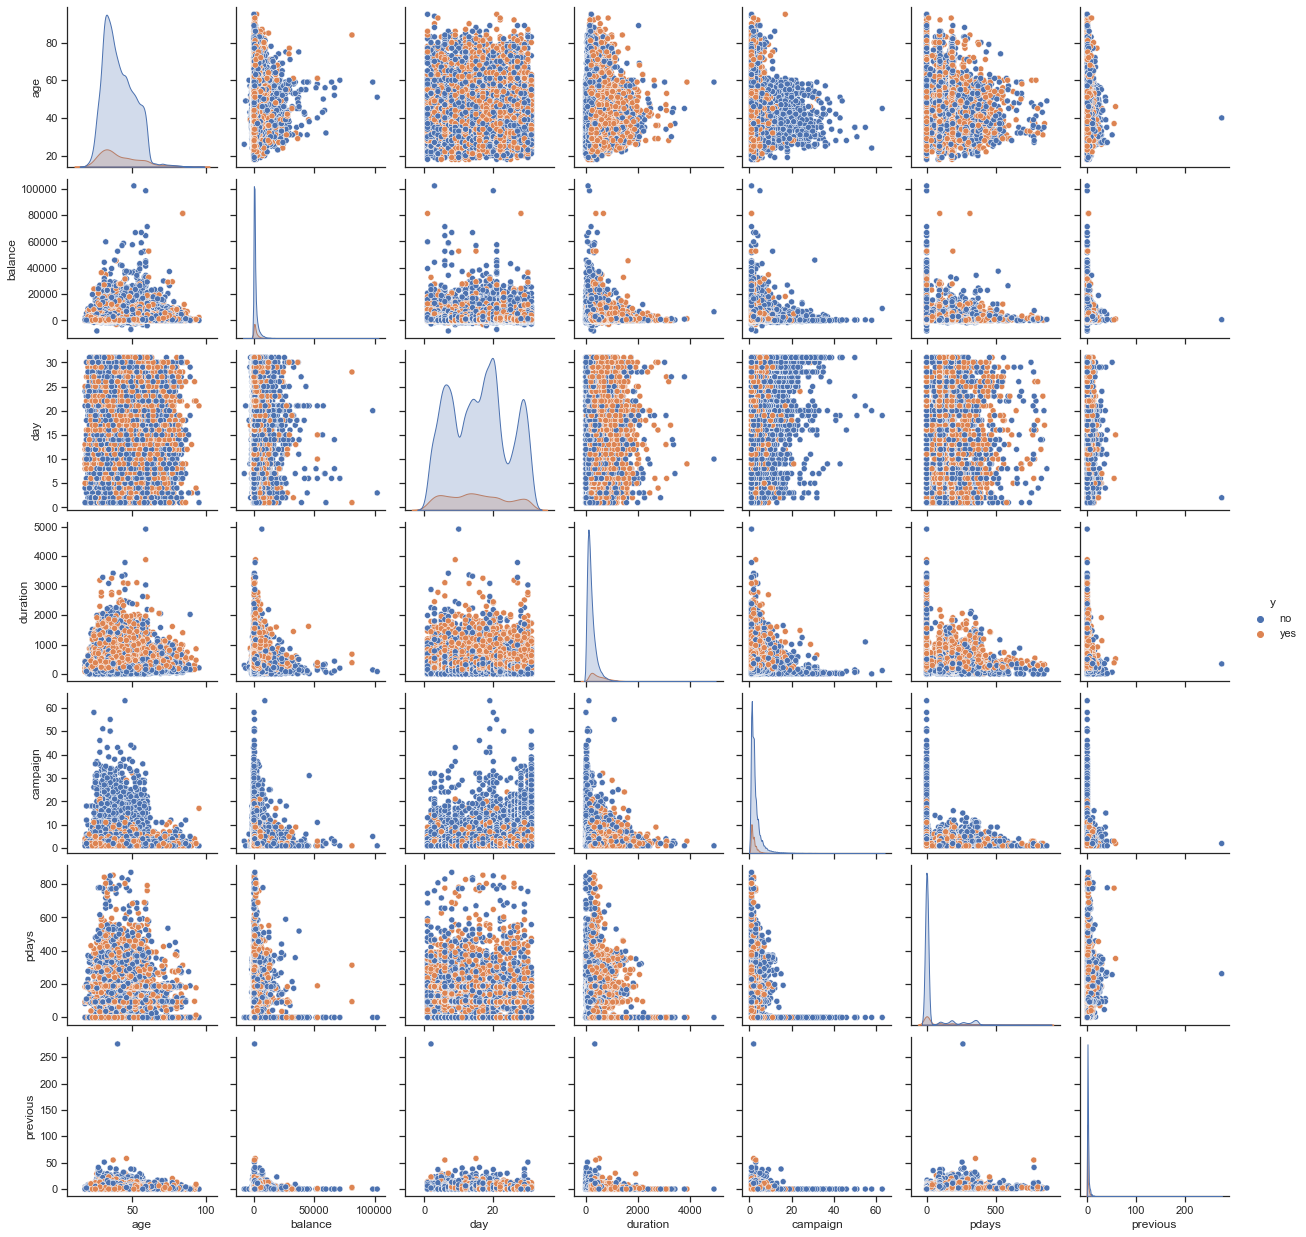

In [24]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [25]:
#groupby

bins = [0, 29, 39, 49, 59, 99]
labels = ['20s', '30s', '40s', '50s', '+60s']
age_groups = pd.cut(df.age, bins, labels=labels)
df['age_groups']  =  age_groups

In [26]:

df.head(25)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_groups
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,50s
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,40s
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,30s
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,40s
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,30s
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no,30s
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no,20s
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no,40s
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no,50s
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no,40s


In [31]:
groups = df.groupby(['age_groups', 'marital', 'loan', 'y'])
groups.size()


age_groups  marital   loan  y  
20s         divorced  no    no       61
                            yes       9
                      yes   no       28
                            yes       2
            married   no    no      968
                            yes      99
                      yes   no      295
                            yes      24
            single    no    no     2510
                            yes     735
                      yes   no      483
                            yes      59
30s         divorced  no    no     1099
                            yes     138
                      yes   no      244
                            yes      20
            married   no    no     7331
                            yes     814
                      yes   no     1616
                            yes      99
            single    no    no     5145
                            yes     777
                      yes   no      741
                            yes      65
40s     

In [28]:
100 * groups.size() / len(df)

age_groups  marital   education  y  
20s         divorced  primary    no     0.015483
                                 yes    0.000000
                      secondary  no     0.132711
                                 yes    0.019907
                      tertiary   no     0.037601
                                          ...   
+60s        single    secondary  yes    0.004424
                      tertiary   no     0.044237
                                 yes    0.017695
                      unknown    no     0.008847
                                 yes    0.000000
Length: 120, dtype: float64

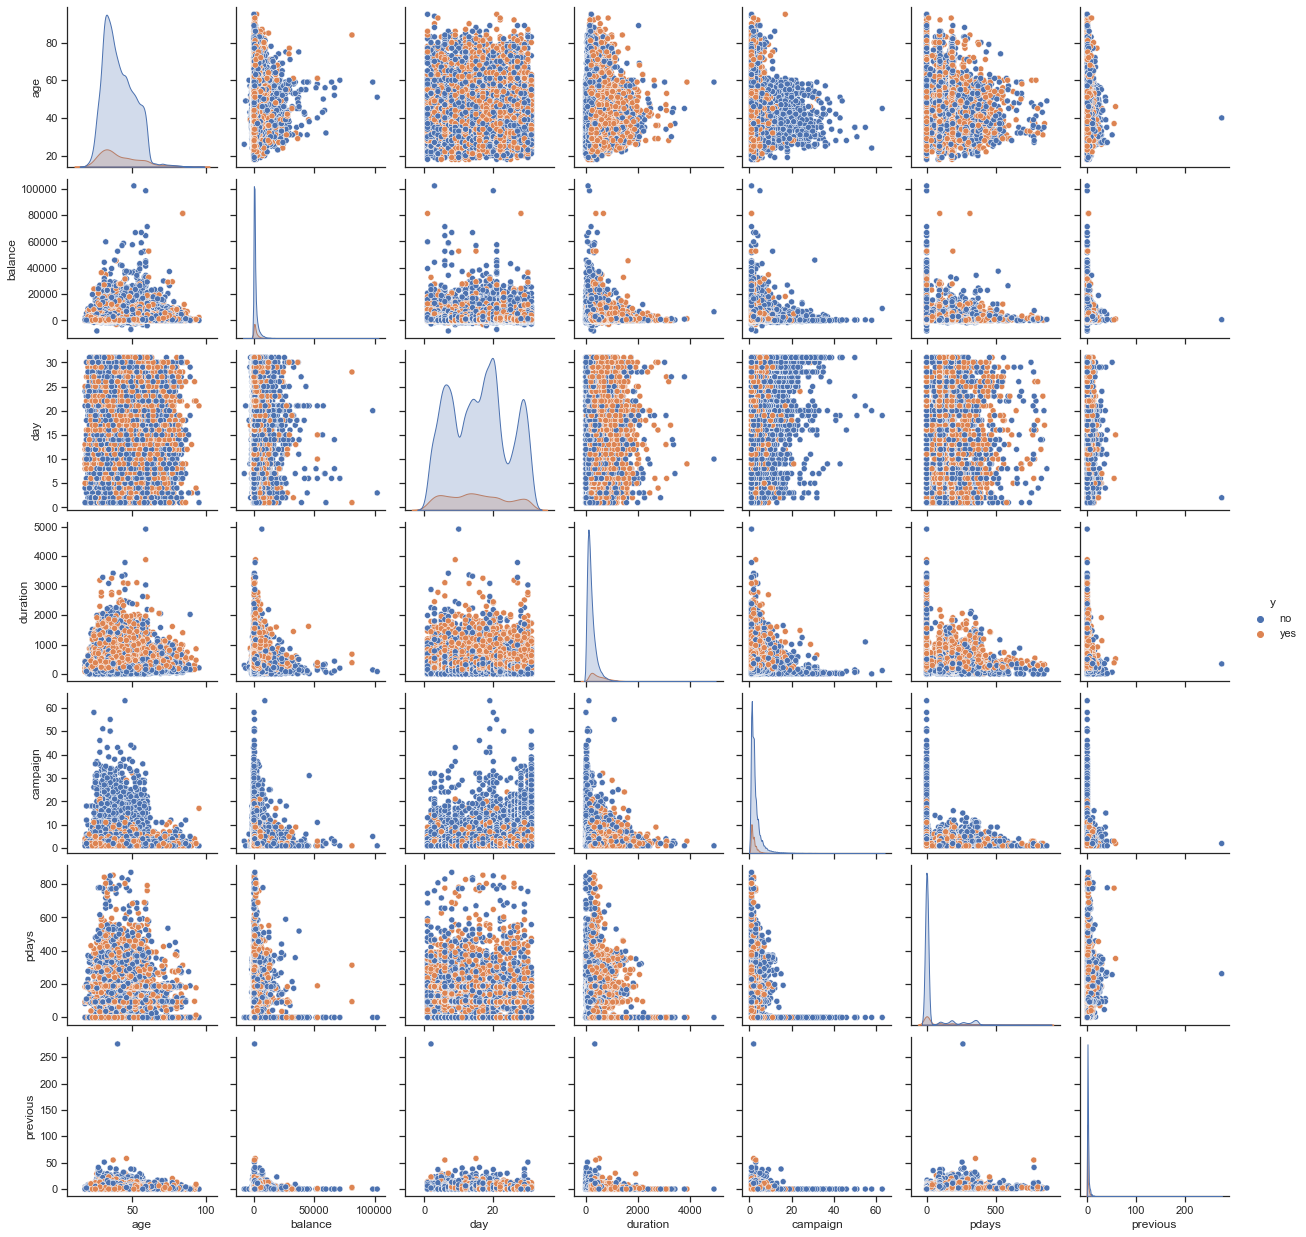

In [20]:
sns.pairplot(df, hue="y")
plt.show()

In [6]:
df.describe()

,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


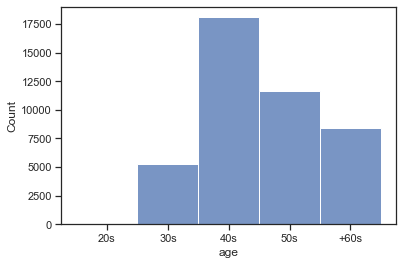

In [41]:
sns.histplot(df.age)
plt.show()


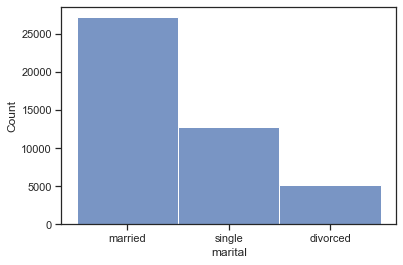

In [42]:
sns.histplot(df.marital)
plt.show()

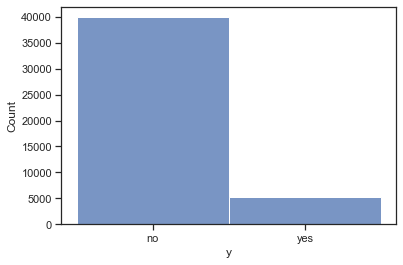

In [43]:
sns.histplot(df.y)
plt.show()

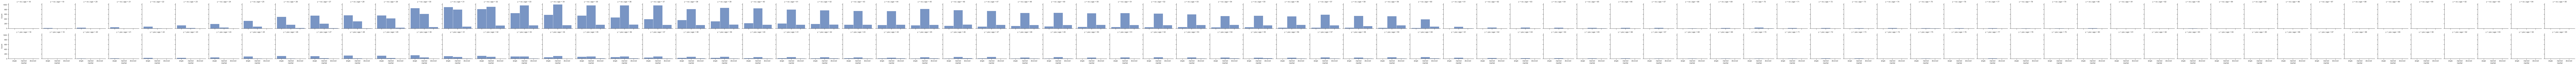

In [21]:
g = sns.FacetGrid(df, row='y', col='age')
g.map(sns.histplot, "marital")
plt.show()

In [49]:
sns.set_theme(style="ticks")
sns.pairplot(df, hue="marital")
plt.show()

KeyboardInterrupt: 

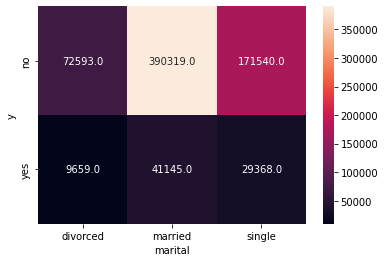

In [34]:
df2 = df.pivot_table(index='y', columns='marital', values='day', aggfunc=np.sum)
sns.heatmap(df2, annot=True, fmt=".1f")
plt.show()

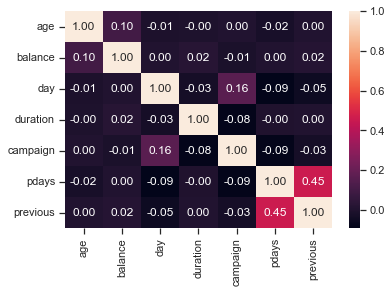

In [32]:
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

ValueError: need at least one array to concatenate

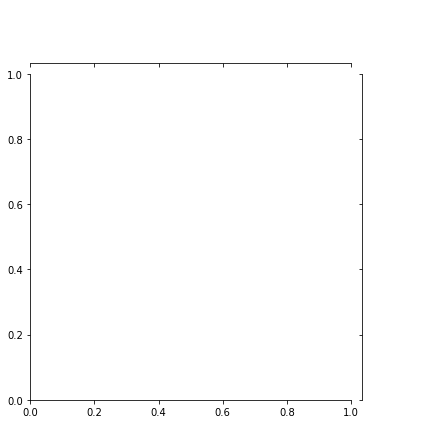

In [21]:
help(sns.jointplot(kind = 'reg'))

In [14]:
sns.jointplot(data=df, x='age', y='marital', kind='reg', color='g')
plt.show()

ValueError: `kind` must be one of ['scatter', 'hist', 'hex', 'kde', 'reg', 'resid'], but y was passed.`

In [49]:
dff = df.pivot_table(index='age', columns='y', values='marital', aggfunc=np.median)
sns.heatmap(dff, annot=True, fmt=".1f")
plt.show()

ValueError: zero-size array to reduction operation fmin which has no identity

In [ ]:
g = sns.FacetGrid(df, row='age', col='marital')
g.map(sns.histplot, "age")
plt.show()

In [2]:
def age_grouping(age):
    
    if age >= 18 and age < 29:
        cat = "20"
    elif age >= 29 and age < 39:
        cat = "30"
    elif age >= 39 and age < 49:
        cat = "40"
    elif age >= 49 and age < 59:
        cat = "50"
    else:
        cat = "+60"

    return cat

In [3]:
df["age_cat"] = df["age"].apply(lambda x:  age_grouping(x))

In [4]:
age_groups = df["age_cat"].value_counts()/df.shape[0]

In [5]:
df_y = df[df["y"] == "yes"]
df_n = df[df["y"] == "no"]

In [6]:
age_groups_y = df_y["age_cat"].value_counts()/df_y.shape[0]

In [7]:
age_groups_n = df_n["age_cat"].value_counts()/df_n.shape[0]

In [8]:
print(age_groups)
print(age_groups_y)
print(age_groups_n)

30     0.393422
40     0.268696
50     0.190971
20     0.090420
+60    0.056491
Name: age_cat, dtype: float64
30     0.366988
40     0.208924
50     0.150879
20     0.143127
+60    0.130081
Name: age_cat, dtype: float64
30     0.396924
40     0.276614
50     0.196283
20     0.083438
+60    0.046741
Name: age_cat, dtype: float64


In [ ]:
married = df_y[df_y['marital'] == 'married']
